### INTRDUCTION
Audience reception  towards a  new movie is the standard xmetric of how good a movie is. the reception builds up to sales performanmce for the movie and this is where the production company mainly focuses on; sales and how much money made in this sense. Current market analysis  and audience reception of movies based on genre, features and  the production company can highly inform a  production companies on where to focus on


###  PROBLEM STATEMENT
This project  aim is to deepdive in the market analysis of movies performance on both consumer and producer segments and come up with actonable items on areas to be priotized at production stage for both parties to benefit. After all; Satisfied clients means constant business.


### OBJECTIVES
1. Analyze the trends and patterns in movie performance on both consumer and producer segments; Point ont which Genres are doing weell
1. Assess the impact of various features (cast, director, genre, budget, etc.) on the reception and sales of movies.
2. Identify areas where the production company can improve its performance.
3. Provide actionable items to be prioritized at production stage for both parties to benefit.
4. Discuss the potential impact of these changes on the overall business.
5. Identify potential competitors and their strengths to counteract the potential drawbacks of the proposed changes.





### DATA UNDERSTANDING


In [51]:
# loading datasets

import pandas as pd
BOM = pd.read_csv('data/bom.movie_gross.csv')
BOM.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Bill of Matrials(BOM dataset)
1. Title of the Movie
2. The data set contains Budgeted cost of production to  incurred domestically and internationally.

In [52]:
# popularity= pd.read_csv('data/tmdb.movies.csv', index_col=0)
# popularity.head()

Popularity dataset contains;
1. Movie ID
2. Movie Title; of key is the original Title; which could serve as the primary key
3. Popularity Score; This score is calculated by taking into account a movie's popularity and critical acclaim.
4. Votes; Number of people who have given a vote to the movie.
5. Revenue; Domestic and international box office revenue.
6. Production Budget; The total cost of producing the movie.
7. Domestic Gross; Domestic box office revenue.
8. Worldwide Gross; Worldwide

In [53]:
movie_info = pd.read_csv('data/rt.movie_info.tsv',sep='\t')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


The Movies_Info Dataset contains
1. synopsis of the Movie 
2. Rating; Inicating wheter the movie is rated or not.
3. Director's Name
4. Genre(s)
5. Runtime in Minutes
6. Release Date; boththeatre and DVD date
7. Studio Name in which the Movie is is produced

In [54]:
# reviews = pd.read_csv('data/rt.reviews.tsv',sep='\t',encoding='latin-1')
# reviews.head()

In [55]:
cost= pd.read_csv('data/tn.movie_budgets.csv')
cost.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


cost dataset contains;
1. The  movie release date
2. Movie title
3. Production Budget; The total cost of producing the movie.
4. Domestic Gross; Domestic cost of producing the movie
5. Worldwide Gross; Worldwide cost of producing the movie


In [58]:
cost = cost.rename(columns={'movie':'title'})
cost.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [76]:
# merge BOM and cost datasets on thre title column

roi_df = pd.merge(BOM, cost, on='title', how='inner')
roi_df .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1247 non-null   object 
 1   studio             1246 non-null   object 
 2   domestic_gross_x   1245 non-null   float64
 3   foreign_gross      1086 non-null   object 
 4   year               1247 non-null   int64  
 5   id                 1247 non-null   int64  
 6   release_date       1247 non-null   object 
 7   production_budget  1247 non-null   object 
 8   domestic_gross_y   1247 non-null   object 
 9   worldwide_gross    1247 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 107.2+ KB


In [79]:
roi_df=roi_df.rename(columns={'domestic_gross_x':'bom_domestic','foreign_gross':'bom_foreign','domestic_gross_y':'domestic_gross'})

In [81]:
#convert bom_foreign,bom-domestic,domestic_gross, domestic_gross,wordwide_gross ,'production_budget' columns to integers


ValueError: Cannot convert non-finite values (NA or inf) to integer

In [6]:
import sqlite3
conn = sqlite3.connect('im.db')
# cursor object to execute SQL queries
cur = conn.cursor()
#list of tables in the database
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())
conn.close

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


<function Connection.close>

In [7]:
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
print(movie_basics.isna().sum())
print("---------------")
print(movie_basics.info())

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64
---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


In [8]:
directors= pd.read_sql_query("SELECT * FROM directors", conn)
print(directors.isna().sum())
print(directors.info())

movie_id     0
person_id    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB
None


In [9]:
movie_ratings= pd.read_sql_query("SELECT * FROM movie_ratings", conn)
print(movie_ratings.isna().sum())
print(movie_ratings.info())

movie_id         0
averagerating    0
numvotes         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


In [10]:
persons= pd.read_sql_query("SELECT * FROM persons", conn)
print(persons.isna().sum())
print(persons.info())

person_id                  0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB
None


In [11]:
principals= pd.read_sql_query("SELECT * FROM principals", conn)
print(principals.isna().sum())
print(principals.info())

movie_id           0
ordering           0
person_id          0
category           0
job           850502
characters    634826
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB
None


In [12]:
combined_df = pd.merge(movie_basics, directors, on='movie_id',how='inner')
combined_df = pd.merge(combined_df, movie_ratings, on='movie_id', how='inner')
combined_df.isna().sum()

movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes    17803
genres              1340
person_id              0
averagerating          0
numvotes               0
dtype: int64

## DATA CLEANING

In [13]:
# drop the runtime_minutes, job and characters from the combined_df
combined_df.drop(['runtime_minutes', 'person_id'], axis=1, inplace=True)
combined_df.isna().sum()

movie_id             0
primary_title        0
original_title       0
start_year           0
genres            1340
averagerating        0
numvotes             0
dtype: int64

In [14]:
# drop the missing values
combined_df.dropna(inplace=True)
print(combined_df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 180049 entries, 0 to 181388
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   movie_id        180049 non-null  object 
 1   primary_title   180049 non-null  object 
 2   original_title  180049 non-null  object 
 3   start_year      180049 non-null  int64  
 4   genres          180049 non-null  object 
 5   averagerating   180049 non-null  float64
 6   numvotes        180049 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 11.0+ MB
None


In [15]:
#check for duplicates
combined_df.duplicated().sum()
#drop duplicates and check the size of the current df 
combined_df.drop_duplicates(inplace=True)
combined_df.shape

(72441, 7)

In [16]:
combined_df.head()

,movie_id,primary_title,original_title,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",7.2,43
5,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517
7,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
8,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",6.5,119


<AxesSubplot:>

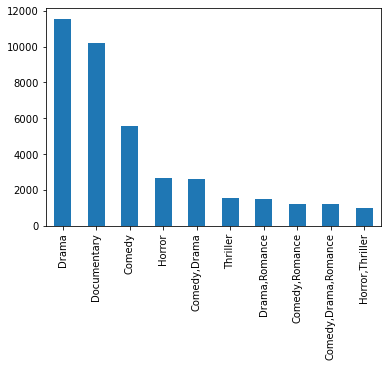

In [17]:
# visualize top 10 common genres
import seaborn  as sns
import matplotlib.pyplot as plt
combined_df['genres'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:xlabel='genres'>

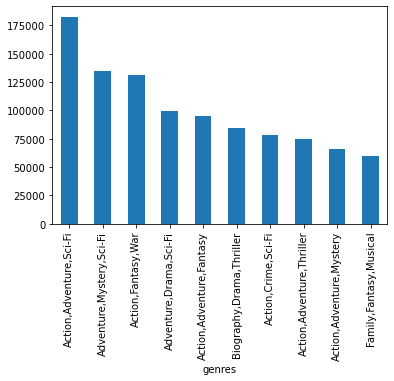

In [18]:
# visualize to 10 genres where avaerage rating is highest
combined_df.groupby('genres')['numvotes'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

<AxesSubplot:xlabel='start_year'>

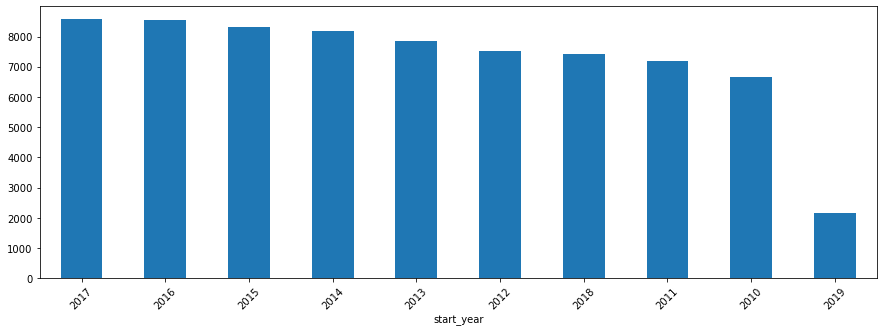

In [20]:
# group the number of movies per year
# indicate the values at the end of the bars

combined_df.groupby('start_year')['movie_id'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,5), rot=45)
#combined_df.groupby('start_year')['movie_id'].count().sort_values(ascending=False).plot(kind='bar')
